In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
sp.init_printing()
import warnings
warnings.filterwarnings("ignore")

## Goals and Commands

#### Goals
1. Learning how to create functions in Jupyter



#### Commands
1. def
2. scatter



This is the perfect topic to introduce functions in Jupyter. Sometimes we need to do the same set of commands over and over. Instead of keep repeating them, we can create a function, so that we can just call the funcction by itself whenever we need it.

Suppose we have a linear transformation $T:\mathbb{R}^2 \rightarrow \mathbb{R}^2$ defined by $T(\bf{x})=\begin{bmatrix} 2 & 0 \\ 1 & -1 \end{bmatrix} \bf{x}$. Lets create a function that will find an image of any vector under this transformation:

In [2]:
def t(x):
    A=np.array([[2,0],[1,-1]])
    image=A@x
    return image

Let's find images of the following vectors $\bf{v_1}=\begin{bmatrix} 4  \\ 2 \end{bmatrix}$, $\bf{v_2}=\begin{bmatrix} -1  \\ 1 \end{bmatrix}$ and $\bf{v_3}=\begin{bmatrix} 0  \\ 0 \end{bmatrix}$

In [3]:
v1, v2, v3 = np.array([4,2]), np.array([-1,1]), np.array([0,0])
t(v1), t(v2), t(v3)

(array([8, 2]), array([-2, -2]), array([0, 0]))

Another nice use is for plotting:

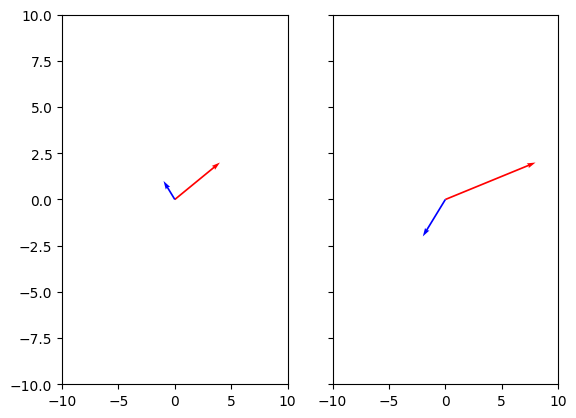

In [4]:
fig, ax = plt.subplots(1, 2, sharey=True, sharex=True)
ax[0].set_xlim([-10, 10])
ax[0].set_ylim([-10, 10])
ax[0].quiver([0,0], [0,0], [v1[0],v2[0]], [v1[1],v2[1]],angles='xy', scale_units='xy',scale=1,color=['r','b'])
ax[1].quiver([0,0], [0,0], [t(v1)[0],t(v2)[0]], [t(v1)[1],t(v2)[1]],angles='xy', scale_units='xy',scale=1,color=['r','b'])
plt.show()

So far we saw what this transformation is doing to specific vectors, but it is hard to see from this what it does globally. Let's see what it does to 1000 vectors. Pay attention to two things in this example:
1. We re using new library scipy. More specifically, we want to use statistical commands. We are using multivariate normal distribution (which is just higher dimension analog of normal distribution) to get 1000 random vectors. These vectors will  be saved in the 1000x2 array X.

2. We also want images of all 1000 vectors. This image will be stored in Y. However, to compute Y, we have to use transpose twice. Can you see why?

3. The `np.arctan2(X[:,0], X[:,1])` part calculates an angle of the vector. A nice way to color vectors and keep track of them.

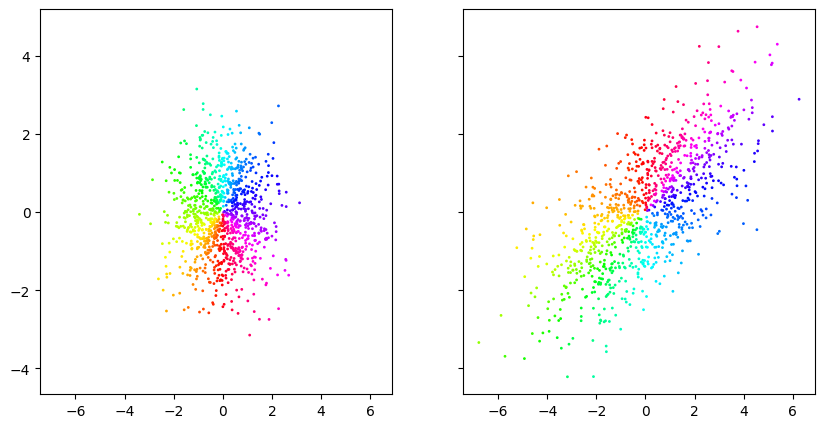

In [5]:
import scipy as sp
import scipy.stats

f, ax = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(10, 5))

# Get 1000 random vectors
mn = sp.stats.multivariate_normal(mean=[0,0], cov=[[1,0],[0,1]])
X = mn.rvs(size=1000)

# Compute images
Y=t(X.T).T

# Plot

ax[0].scatter(X[:,0], X[:,1], s = 1, c=np.arctan2(X[:,0], X[:,1]), cmap='hsv')
ax[1].scatter(Y[:,0], Y[:,1], s = 1, c=np.arctan2(X[:,0], X[:,1]), cmap='hsv')
plt.show()


You should be able to see now that this transformation is stretching things to lower-left and upper right corners and there is a flip.